In [ ]:
import tensorflow as tf
from tensorflow import keras
import random
from cv2 import GaussianBlur
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Reshape
from keras.models import Model
from keras.layers import BatchNormalization

In [ ]:
def getDataset():
  (x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
  normalize = lambda x: x/x.max()
  x_train = normalize(x_train)
  x_test = normalize(x_test)
  createBlurred = lambda arr: np.array([GaussianBlur(x, (5,5), ((random.random()*3)+1)) + (0.02*np.random.normal(0,1, (32, 32, 3))) for x in arr])
  return (createBlurred(x_train), x_train), (createBlurred(x_test), x_test)

In [ ]:
[x_train, y_train],  [x_test, y_test] = getDataset()  

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

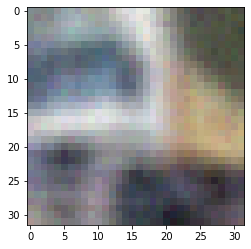

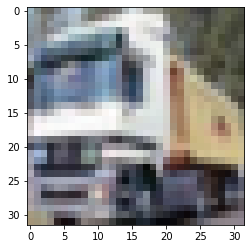

In [ ]:
plt.imshow (x_train[1])
plt.show()
plt.imshow(y_train[1])
plt.show()

In [ ]:
Input_img = Input(shape=(32, 32, 3))  
    
x = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x= Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x= Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x= Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x= Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x= Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = Conv2D(4, (3, 3), activation='relu', padding='same')(x)

# decoding architecture
x = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x= Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x= Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x= Conv2D(256, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), padding='same')(x)


autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       295040    
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 8)         1160  

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
autoencoder.load_weights("/content/gdrive/MyDrive/model.h5")

Mounted at /content/gdrive


In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=30, verbose=1, mode='auto')

a_e = autoencoder.fit(x_train, y_train,
            epochs=1000,
            batch_size=256,
            shuffle=True,
            validation_split=0.20,
            callbacks=[early_stopper])

Epoch 1/1000
  1/157 [..............................] - ETA: 1:12:09 - loss: 0.0024

In [ ]:
predictions = autoencoder.predict(x_test)


plt.imshow (predictions[1])
print ("Model output")
plt.show()
plt.imshow(x_test[1])
print("blurred image")
plt.show()
plt.imshow(y_test[1])
print("target image")
plt.show()

plt.imshow (predictions[2])
print ("Model output")
plt.show()
plt.imshow(x_test[2])
print("blurred image")
plt.show()
plt.imshow(y_test[2])
print("target image")
plt.show()




In [ ]:
autoencoder.evaluate(x_test,y_test)

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#autoencoder.save("/content/gdrive/MyDrive/model.h5")